<h1>Calculate <i>&#8508-value</i> using Monthe-Carlo method</h1>
<hr>
We have to calculate <BIG>&#8508</BIG>. So we have a square with lenght of side <i>2</i>. In this square cirle was inscribed, so the radius of it equel to <i>1</i>
<CENTER>
<img src="monte-carlo.jpg" width="250" height="275">
</CENTER>
As we know area of square and cirle can be calculated like:
<CENTER>
    <math>
	    S<sub>circle</sub> = &#8508 r<sup>2</sup>
        <br>
        S<sub>square</sub> = a<sup>2</sup>, <i>where the 'a' is a lenght of side</i>
    </math>
</CENTER>

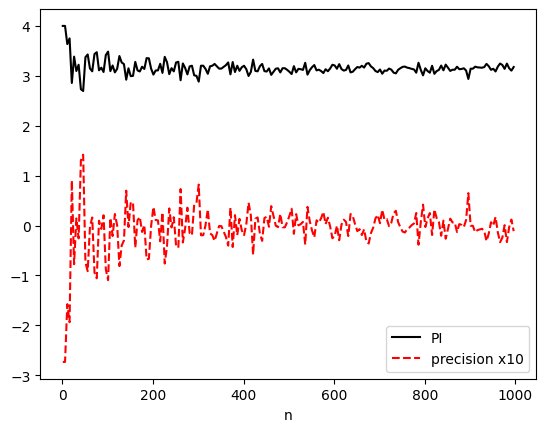

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calc(n):
    dots = np.random.uniform(-1, 1, size=(n,2))
    x = np.sum((dots[:,0]**2+dots[:,1]**2)<1)
    Pi = 4*x/n
    precision = 1 - Pi/math.pi
    return Pi, precision

n = np.arange(1, 1000, 5)
v_calc = np.vectorize(calc)
Pi, precision = v_calc(n)
plt.plot(n, Pi, color='black', label='PI')
plt.plot(n, precision*10, color='red', linestyle='--', label='precision x10')
plt.xlabel('n')
plt.legend(loc="lower right")
plt.show()

<h1>Find unknown veriables <b>a, b</b>, using the dialog of two scientists</h1>
<hr>
1 < a,b < 100

a*b = sub

a+b = sum

<h3><i><b>pr. Prod</b>: I don't know this numebers</i></h3>

In [ ]:
prods = []
for k in range(2, 99*99 + 1):
    num = 0
    for i in range(2, 100):
        for j in range(2, 100):
            if i*j == k: num+=1
    if num > 2: prods.append(k)

#subs is the list of substracts that can be true

<h3><i><b>pr. Sum</b>: I knew that</i></h3>

In [ ]:
sums = range(4, 199)
#from of pr. Sub, pr.Sum gets the knowledge about subs-list


Lets call <i> the product</i> as <b>S</b> and <i>the sum</i> as <b>p</b>.


Let`s see what <b>S</b> can exist if we know the <b>p</b>:<br>
<br>p = [[a<sub>1</sub> + b<sub>1</sub>, S<sub>1</sub>], [a<sub>2</sub> + b<sub>2</sub>, S<sub>2</sub>]....[a<sub>n</sub> + b<sub>n</sub>, S<sub>n</sub>]]<br>
4 = [[2+2, 4]]<br>
5 = [[3+2, 6]]<br>
6 = [[3+3, 9], [4+2, 8]]<br>
7 = [[4+3, 12], [5+2, 10]]<br>
8 = [[4+4, 16], [5+3, 15], [6+2, 12]]<br>
9 = [[5+4, 20], [6+3, 18], [7+2, 14]]<br>
          .<br>
          .<br>
          .<br>
Now I want to create a matrix filled with <b>S</b> values, number of row here is equel to <b>p-4</b>



In [ ]:
import numpy as np
matrix = np.zeros([len(sums),100])

#this func gonna fill matrix with values of S as it was described before
def fill_the_matrix(matrix):
    columns_number = matrix.shape[1]
    rows_number = matrix.shape[0]
    print('rows:', rows_number, 'columns:', columns_number)
    for i in range(rows_number):
        values_number = (i+2)//2
        matrix[i, 0] = i+4
        for j in range(values_number):
            a = (i+4)//2 + j if (i+4)%2 == 0 else ((i+4)//2)+1  + j
            b = (i+4)//2 - j
            matrix[i, j+1] = a*b
    return matrix

matrix = fill_the_matrix(matrix=matrix)

#So I created the matrix, where first column is the array of all possible p-values
#and values in matrix[i, 1:] are all possible variant of S for every possible p

rows: 195 columns: 100


In [ ]:
#As pr.Sum has known that pr.Prod don't know the numbers then all "Ss" that are
#avalible in his line are in list of pods. So I delete every row where is any "S",
#which is not in list of prods


#this func checks if all non-null S_elements in row are in prods-list
def is_in(matrix, i):
    num_1 = matrix[i,1:][matrix[i,1:]!=0].size
    num_2 = np.sum(np.isin(matrix[i,1:][matrix[i,1:]!=0], prods))
    return (num_1 == num_2)

#eluminates all rows where is_in() == False
def elumination(matrix):
    for i in range(matrix.shape[0]-1,0,-1):
        if not is_in(matrix, i): matrix = np.delete(matrix, i, 0)
    return matrix


matrix = elumination(matrix)

#Due to reverse looping 0 row has not been checked, but as it contains S-value = 4
#this row is going to be deleted too
matrix = np.delete(matrix, 0, 0)


print(matrix[:, 0:13])

[[ 11.  30.  28.  24.  18.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 17.  72.  70.  66.  60.  52.  42.  30.   0.   0.   0.   0.   0.]
 [ 23. 132. 130. 126. 120. 112. 102.  90.  76.  60.  42.   0.   0.]
 [ 27. 182. 180. 176. 170. 162. 152. 140. 126. 110.  92.  72.  50.]
 [ 29. 210. 208. 204. 198. 190. 180. 168. 154. 138. 120. 100.  78.]
 [ 35. 306. 304. 300. 294. 286. 276. 264. 250. 234. 216. 196. 174.]
 [ 37. 342. 340. 336. 330. 322. 312. 300. 286. 270. 252. 232. 210.]
 [ 41. 420. 418. 414. 408. 400. 390. 378. 364. 348. 330. 310. 288.]
 [ 47. 552. 550. 546. 540. 532. 522. 510. 496. 480. 462. 442. 420.]
 [ 53. 702. 700. 696. 690. 682. 672. 660. 646. 630. 612. 592. 570.]]


In [ ]:
#Also S cannot be unique number. So if a row a row has an unique S-value it unables its p-value

#Getting all unque S-values
v, c = np.unique(matrix[:,1:], return_counts=True)
unique_S = v[np.argwhere(c==1)].reshape(1, -1).ravel()

#Checking every row for having unique S-value
newmatrix = matrix.copy()
for i in range(newmatrix.shape[0]-1,0,-1):
    if np.intersect1d(newmatrix[i, :], unique_S) != []: newmatrix = np.delete(newmatrix, i, 0)

if np.intersect1d(newmatrix[0, :], unique_S) != []: newmatrix = np.delete(newmatrix, 0, 0)
print(newmatrix[:, 0:13])

[[17. 72. 70. 66. 60. 52. 42. 30.  0.  0.  0.  0.  0.]]


C:\Users\ostap\AppData\Local\Temp\ipykernel_10836\3522866453.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.intersect1d(matrix[i, :], unique_S) != []: matrix = np.delete(matrix, i, 0)
C:\Users\ostap\AppData\Local\Temp\ipykernel_10836\3522866453.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.intersect1d(matrix[i, :], unique_S) != []: matrix = np.delete(matrix, i, 0)
C:\Users\ostap\AppData\Local\Temp\ipykernel_10836\3522866453.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.intersect1d(matrix[0, :], unique_S) != []: matrix = np.delete(matrix, 0, 0)


So here we know <i><b>p = 17</b><i> 

In [ ]:
unique_S

<h3><i><b>pr. Prod</b>: then I know this numbers</i></h3>